<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Processing</a></span><ul class="toc-item"><li><span><a href="#Drug-Outcome-variable-transformations" data-toc-modified-id="Drug-Outcome-variable-transformations-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Drug Outcome variable transformations</a></span><ul class="toc-item"><li><span><a href="#Remove-string-and-change-to-integer" data-toc-modified-id="Remove-string-and-change-to-integer-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Remove string and change to integer</a></span></li><li><span><a href="#Create-3-broader-outcome-variables-(Stimulants,-Depressants-and-Hallucinogens)" data-toc-modified-id="Create-3-broader-outcome-variables-(Stimulants,-Depressants-and-Hallucinogens)-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Create 3 broader outcome variables (<em>Stimulants, Depressants and Hallucinogens</em>)</a></span></li><li><span><a href="#Recode-from-7-levels-to-3-levels" data-toc-modified-id="Recode-from-7-levels-to-3-levels-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Recode from 7 levels to 3 levels</a></span></li></ul></li></ul></li><li><span><a href="#Correlations-on-cleaned-data" data-toc-modified-id="Correlations-on-cleaned-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Correlations on cleaned data</a></span></li><li><span><a href="#Initial-Models-On-Cleaned-Data" data-toc-modified-id="Initial-Models-On-Cleaned-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Initial Models On Cleaned Data</a></span><ul class="toc-item"><li><span><a href="#Multinomial-Logit---Stimulants" data-toc-modified-id="Multinomial-Logit---Stimulants-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Multinomial Logit - Stimulants</a></span><ul class="toc-item"><li><span><a href="#Multivariate" data-toc-modified-id="Multivariate-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Multivariate</a></span></li><li><span><a href="#Bivariate" data-toc-modified-id="Bivariate-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Bivariate</a></span></li></ul></li><li><span><a href="#Multinomial-Logit----Depressants" data-toc-modified-id="Multinomial-Logit----Depressants-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Multinomial Logit -  Depressants</a></span><ul class="toc-item"><li><span><a href="#Multivariate" data-toc-modified-id="Multivariate-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Multivariate</a></span></li><li><span><a href="#Bivariate" data-toc-modified-id="Bivariate-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Bivariate</a></span></li></ul></li><li><span><a href="#Multinomial-Logit---Hallucinogens" data-toc-modified-id="Multinomial-Logit---Hallucinogens-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Multinomial Logit - Hallucinogens</a></span><ul class="toc-item"><li><span><a href="#Multivariate" data-toc-modified-id="Multivariate-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Multivariate</a></span></li><li><span><a href="#Bivariate" data-toc-modified-id="Bivariate-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Bivariate</a></span></li></ul></li></ul></li></ul></div>

# Introduction

In this notebook addition, data pre-processing is completed to clean the data. The three primary goals to accomplish were:

1. Remove strings and change to integer levels
2. Create 3 broader outcome variables (Stimulants, Depressants and Hallucinogens)
3. Recode from 7 levels to 3 levels

The second section carries out additional correlations on the revised outcome variables to try and capture any new potential associations from the cleaned data outcomes. Pearson correlations are used in a correlation matrix for each outcome (stimulants, depressants and hallucinogens).

Section three carries out initial modeling using bivariate and multivariate regressions using multinomial logistic regressions. The bivariate regressions were used to understand on a one-to-one basis whether the independent variables were statistically significant as predictor variables and to help decide if they should be included as concurrent features in the main models. Multivariate regressions were calibrated to control for all of the independent variables to see which predictors remained statistically significant and to understand their magnitude and direction. These co-efficients and the feature importance values from later models were used to assess for the strongest predictors of the drug use outcomes.



# Data Processing

In [1]:
#load libraries
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
%matplotlib inline

In [2]:
#read in dataset
df = pd.read_csv("../drug_consumption_cap_20230505.csv")
df

,ID,Age,Gender,Education,Country,Ethnicity,NEO_N,NEO_E,NEO_O,NEO_A,...,ECST,HEROIN,KETA,LEGALH,LSD,METH,MUSHRM,NICO,SEMER,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


## Drug Outcome variable transformations

### Remove string and change to integer

In [3]:
#select only the drug variable columns
df.iloc[:,13:]

,ALC,AMPHET,AMYL,BENZOS,CAFF,CANNABIS,CHOC,COCAINE,CRACK,ECST,HEROIN,KETA,LEGALH,LSD,METH,MUSHRM,NICO,SEMER,VSA
0,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [4]:
#remove 'CL' prefix
df.iloc[:,13:] = df.iloc[:,13:].applymap(lambda x: re.sub('CL','',x))
df.iloc[:,13:]

,ALC,AMPHET,AMYL,BENZOS,CAFF,CANNABIS,CHOC,COCAINE,CRACK,ECST,HEROIN,KETA,LEGALH,LSD,METH,MUSHRM,NICO,SEMER,VSA
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,5,0,0,0,4,5,4,0,0,0,0,0,3,3,0,0,0,0,5
1881,5,0,0,0,5,3,4,0,0,2,0,0,3,5,4,4,5,0,0
1882,4,6,5,5,6,6,6,4,0,4,0,2,0,2,0,2,6,0,0
1883,5,0,0,0,6,6,5,0,0,3,0,0,3,3,0,3,4,0,0


In [5]:
#recode as integer field type
df.iloc[:,13:] = df.iloc[:,13:].apply(lambda x: x.astype(int))
#check for field type of outcomes (should be integers)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   NEO_N      1885 non-null   float64
 7   NEO_E      1885 non-null   float64
 8   NEO_O      1885 non-null   float64
 9   NEO_A      1885 non-null   float64
 10  NEO_C      1885 non-null   float64
 11  IMP        1885 non-null   float64
 12  SS         1885 non-null   float64
 13  ALC        1885 non-null   int32  
 14  AMPHET     1885 non-null   int32  
 15  AMYL       1885 non-null   int32  
 16  BENZOS     1885 non-null   int32  
 17  CAFF       1885 non-null   int32  
 18  CANNABIS   1885 non-null   int32  
 19  CHOC       1885 non-null   int32  
 20  COCAINE 

### Create 3 broader outcome variables (*Stimulants, Depressants and Hallucinogens*)

In [6]:
#testing function to group drugs to create a new outcome variable
def create_drug_test(row):      
    return max(row['ALC'],row['AMPHET'],row['AMYL'],\
              row['BENZOS'],row['CANNABIS'])

In [7]:
#test on first three throws - before and after
display(df.iloc[:3,13:])

#selection from row
display(df.iloc[:3,13:].apply(lambda x: create_drug_test(x), axis=1))

,ALC,AMPHET,AMYL,BENZOS,CAFF,CANNABIS,CHOC,COCAINE,CRACK,ECST,HEROIN,KETA,LEGALH,LSD,METH,MUSHRM,NICO,SEMER,VSA
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0


0    5
1    5
2    6
dtype: int64

In [8]:
#function to group drugs to create a new stimulants outcome variable
def create_stimulants(row):      
    return max(row['AMPHET'],row['NICO'],row['COCAINE'],\
              row['CRACK'],row['CAFF'],row['CHOC'])

In [9]:
#function to group drugs to create a new depressants outcome variable
def create_depressants(row):      
    return max(row['ALC'],row['AMYL'],row['BENZOS'],row['VSA'],row['HEROIN'],\
              row['METH'])

In [10]:
#function to group drugs to create a new hallucinogens outcome variable
def create_hallucinogens(row):      
    return max(row['CANNABIS'],row['ECST'],row['KETA'],row['LSD'],\
               row['MUSHRM'],row['LEGALH'])

In [11]:
df["stimulants"] = df.iloc[:,13:].apply(lambda x: create_stimulants(x).astype(int), axis=1)
df["depressants"] = df.iloc[:,13:].apply(lambda x: create_depressants(x).astype(int), axis=1)
df["hallucinogens"] = df.iloc[:,13:].apply(lambda x: create_hallucinogens(x).astype(int), axis=1)



In [12]:
#display
df

,ID,Age,Gender,Education,Country,Ethnicity,NEO_N,NEO_E,NEO_O,NEO_A,...,LEGALH,LSD,METH,MUSHRM,NICO,SEMER,VSA,stimulants,depressants,hallucinogens
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,2,0,0,6,5,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,0,2,3,0,4,0,0,6,5,4
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,1,0,0,0,6,6,3
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,2,0,0,5,4,2
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,2,2,0,0,6,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,3,3,0,0,0,0,5,4,5,5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,3,5,4,4,5,0,0,5,5,5
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,0,2,0,2,6,0,0,6,5,6
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,3,3,0,3,4,0,0,6,5,6


### Recode from 7 levels to 3 levels

In [13]:
#define recoding function
def recode(val):
    
    #for values greater than equal to 4
    if val >= 4:
        return 3
    #for values 2 and 3
    if (val >=2) & (val< 4):
        return 2
    #for all others
    else:
        return 0

In [14]:
df[['stim_final','dep_final','hallu_final']] = df[['stimulants','depressants','hallucinogens']].applymap(lambda x: recode(x))

In [15]:
df

,ID,Age,Gender,Education,Country,Ethnicity,NEO_N,NEO_E,NEO_O,NEO_A,...,MUSHRM,NICO,SEMER,VSA,stimulants,depressants,hallucinogens,stim_final,dep_final,hallu_final
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,2,0,0,6,5,0,3,3,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,0,4,0,0,6,5,4,3,3,3
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,1,0,0,0,6,6,3,3,3,2
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,2,0,0,5,4,2,3,3,2
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,2,2,0,0,6,4,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,5,4,5,5,3,3,3
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,4,5,0,0,5,5,5,3,3,3
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,2,6,0,0,6,5,6,3,3,3
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,3,4,0,0,6,5,6,3,3,3


In [16]:
df[['stim_final','dep_final','hallu_final']].apply(df.value_counts)

,stim_final,dep_final,hallu_final
0,4,42,584
2,8,215,418
3,1873,1628,883


# Correlations on cleaned data

----------------------------------------stim_final----------------------------------------


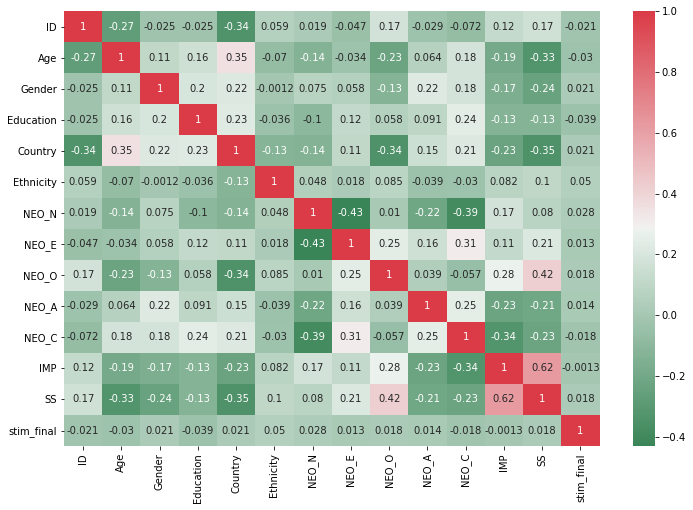

----------------------------------------dep_final----------------------------------------


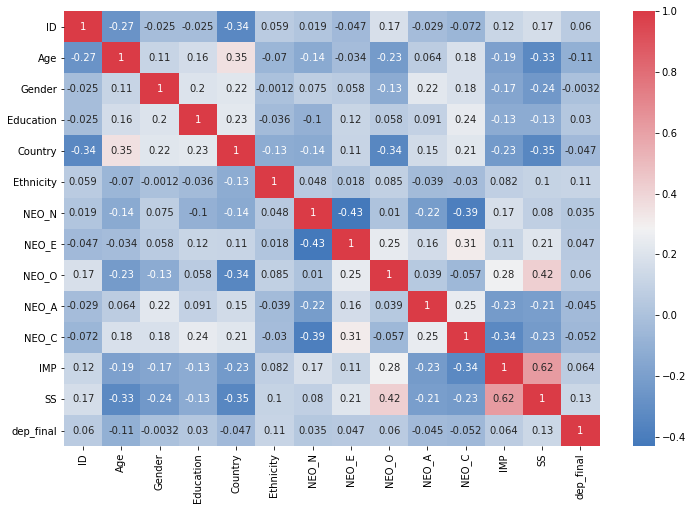

----------------------------------------hallu_final----------------------------------------


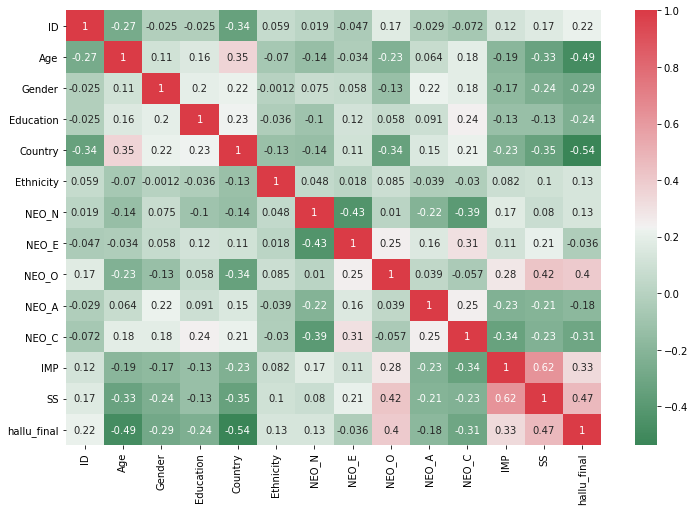

In [17]:
#subset only indepent variables
x_vars = df.iloc[:,:13]
#subset the three final drug outcome variables
out = df[['stim_final','dep_final','hallu_final']]

#loop through each drug outcome
for i in range(len(out.columns)):
    
    #print name of drug outcome
    print(("-")*40+out.columns[i]+("-")*40)
    
    #concatenate drug outcome with independent variables
    cor_df = pd.concat([x_vars,out.iloc[:,i]],axis =1)
    
    #set fig size
    fig, ax = plt.subplots(figsize=(12,8))
    
    #odd and even correlation plot colours
    if i%2 == 0:
        
        #blue and red
        cmap = sns.diverging_palette(500, 10, as_cmap=True)
        sns.heatmap(cor_df.corr(),cmap = cmap, annot=True, ax=ax)
        plt.show()
    
    else:
        
        #green and red
        cmap = sns.diverging_palette(250, 10, as_cmap=True)
        sns.heatmap(cor_df.corr(),cmap = cmap, annot=True, ax=ax)
        plt.show()

# Initial Models On Cleaned Data

## Multinomial Logit - Stimulants
### Multivariate

In [56]:
#import libraries
import statsmodels.api as sm

In [57]:
#subset independent variables
x_vars = df.iloc[:,1:13]

#instantiate and fit model on stimulants data
mnlogit = sm.MNLogit(df["stim_final"],sm.add_constant(x_vars)).fit()

Optimization terminated successfully.
         Current function value: 0.034573
         Iterations 11


In [59]:
#coefficients
mnlogit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: MNLogit
===============================================================
Model:              MNLogit          Pseudo R-squared: 0.188   
Dependent Variable: stim_final       AIC:              182.3406
Date:               2022-07-26 21:42 BIC:              326.4244
No. Observations:   1885             Log-Likelihood:   -65.170 
Df Model:           24               LL-Null:          -80.281 
Df Residuals:       1859             LLR p-value:      0.17751 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     11.0000                                    
--------------------------------------------------------------
stim_final = 0  Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------
        const   4.2435   1.7540  2.4194 0.0155  0.8058  7.6812
          Age  -0.6835   0.8026 -0.8516 0.3944 -2.2566  0.8896
       Gender   0.7811   1.5536  0.5028 0.6151 -2.2640  3.8262
    Education  -0.0179   0.7979 -0.0224 0.9821 -1.5818  1.5460
      Country   0.0665   1.0973  0.0606 0.9517 -2.0842  2.2171
    Ethnicity   6.8890   2.0991  3.2819 0.0010  2.7749 11.0032
        NEO_N   0.4627   0.7942  0.5825 0.5602 -1.0940  2.0193
        NEO_E   0.0158   0.8187  0.0193 0.9846 -1.5888  1.6205
        NEO_O   0.4933   0.8074  0.6109 0.5412 -1.0892  2.0757
        NEO_A   0.8032   0.7546  1.0643 0.2872 -0.6759  2.2822
        NEO_C  -1.1067   0.8487 -1.3040 0.1922 -2.7702  0.5568
          IMP  -1.9717   0.9652 -2.0427 0.0411 -3.8636 -0.0799
           SS   0.0330   1.0438  0.0316 0.9748 -2.0128  2.0787
--------------------------------------------------------------
stim_final = 1  Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------
        const   9.5776   1.6741  5.7210 0.0000  6.2964 12.8588
          Age  -0.6067   0.6450 -0.9407 0.3469 -1.8709  0.6575
       Gender   0.9735   1.3276  0.7333 0.4634 -1.6286  3.5756
    Education  -0.8821   0.6770 -1.3030 0.1926 -2.2090  0.4447
      Country   1.1703   0.9058  1.2920 0.1964 -0.6051  2.9456
    Ethnicity   5.1130   1.7945  2.8492 0.0044  1.5958  8.6302
        NEO_N   0.7381   0.6704  1.1010 0.2709 -0.5758  2.0520
        NEO_E   0.2616   0.6718  0.3894 0.6970 -1.0551  1.5782
        NEO_O   0.5835   0.6890  0.8469 0.3970 -0.7669  1.9340
        NEO_A   0.5978   0.6538  0.9144 0.3605 -0.6836  1.8792
        NEO_C  -0.6548   0.7285 -0.8988 0.3687 -2.0827  0.7730
          IMP  -1.4451   0.8213 -1.7594 0.0785 -3.0549  0.1647
           SS   0.4971   0.9068  0.5482 0.5836 -1.2802  2.2744
===============================================================

"""

### Bivariate

In [51]:
#subset independent variables
x_vars = df.iloc[:,1:13]

#run bivariate logit regressions for each pair of independent variable and stimulants
for i in x_vars:
    
    #print name of independent variable
    print(("-")*40+i+("-")*40)
    #instantiate and fit model
    mnlogit = sm.MNLogit(df["stim_final"],sm.add_constant(df[i])).fit()
    #show model results
    display(mnlogit.summary())


----------------------------------------Age----------------------------------------
Optimization terminated successfully.
         Current function value: 0.042090
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             stim_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.01173
Time:                        14:06:25   Log-Likelihood:                -79.339
converged:                       True   LL-Null:                       -80.281
Covariance Type:            nonrobust   LLR p-value:                    0.3898
================================================================================
stim_final=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9420      0.706      1.335      0.182      -0.441       2.325
Age             -0.7151      0.666     -1.074      0.283      -2.021       0.590
--------------------------------------------------------------------------------
stim_final=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3988      0.611     10.475      0.000       5.202       7.596
Age             -0.7370      0.532     -1.384      0.166      -1.781       0.307
================================================================================
"""

----------------------------------------Gender----------------------------------------
Optimization terminated successfully.
         Current function value: 0.042312
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             stim_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.006518
Time:                        14:06:25   Log-Likelihood:                -79.758
converged:                       True   LL-Null:                       -80.281
Covariance Type:            nonrobust   LLR p-value:                    0.5926
================================================================================
stim_final=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8370      0.677      1.236      0.216      -0.490       2.164
Gender           1.1386      1.403      0.811      0.417      -1.612       3.889
--------------------------------------------------------------------------------
stim_final=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2928      0.578     10.891      0.000       5.160       7.425
Gender           1.1397      1.198      0.952      0.341      -1.208       3.487
================================================================================
"""

----------------------------------------Education----------------------------------------
Optimization terminated successfully.
         Current function value: 0.041588
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             stim_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.02351
Time:                        14:06:25   Log-Likelihood:                -78.393
converged:                       True   LL-Null:                       -80.281
Covariance Type:            nonrobust   LLR p-value:                    0.1514
================================================================================
stim_final=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7132      0.710      1.005      0.315      -0.678       2.104
Education       -0.0381      0.674     -0.057      0.955      -1.359       1.282
--------------------------------------------------------------------------------
stim_final=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3209      0.583     10.841      0.000       5.178       7.464
Education       -0.6325      0.552     -1.146      0.252      -1.714       0.449
================================================================================
"""

----------------------------------------Country----------------------------------------
Optimization terminated successfully.
         Current function value: 0.042172
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             stim_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.009811
Time:                        14:06:25   Log-Likelihood:                -79.494
converged:                       True   LL-Null:                       -80.281
Covariance Type:            nonrobust   LLR p-value:                    0.4549
================================================================================
stim_final=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7271      0.628      1.157      0.247      -0.504       1.959
Country         -0.2638      0.864     -0.305      0.760      -1.958       1.430
--------------------------------------------------------------------------------
stim_final=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.0601      0.519     11.675      0.000       5.043       7.077
Country          0.3213      0.701      0.458      0.647      -1.054       1.696
================================================================================
"""

----------------------------------------Ethnicity----------------------------------------
Optimization terminated successfully.
         Current function value: 0.040904
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             stim_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.03957
Time:                        14:06:25   Log-Likelihood:                -77.104
converged:                       True   LL-Null:                       -80.281
Covariance Type:            nonrobust   LLR p-value:                   0.04171
================================================================================
stim_final=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.6764      1.010      2.651      0.008       0.698       4.655
Ethnicity        5.3833      1.692      3.181      0.001       2.066       8.700
--------------------------------------------------------------------------------
stim_final=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.7641      0.918      8.462      0.000       5.966       9.562
Ethnicity        4.0769      1.383      2.947      0.003       1.366       6.788
================================================================================
"""

----------------------------------------NEO_N----------------------------------------
Optimization terminated successfully.
         Current function value: 0.042169
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             stim_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.009882
Time:                        14:06:25   Log-Likelihood:                -79.488
converged:                       True   LL-Null:                       -80.281
Covariance Type:            nonrobust   LLR p-value:                    0.4523
================================================================================
stim_final=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8735      0.686      1.274      0.203      -0.470       2.217
NEO_N            0.5032      0.616      0.817      0.414      -0.704       1.710
--------------------------------------------------------------------------------
stim_final=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3353      0.587     10.800      0.000       5.186       7.485
NEO_N            0.6141      0.504      1.218      0.223      -0.374       1.602
================================================================================
"""

----------------------------------------NEO_E----------------------------------------
Optimization terminated successfully.
         Current function value: 0.042261
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             stim_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.007703
Time:                        14:06:25   Log-Likelihood:                -79.663
converged:                       True   LL-Null:                       -80.281
Covariance Type:            nonrobust   LLR p-value:                    0.5388
================================================================================
stim_final=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6187      0.628      0.984      0.325      -0.613       1.850
NEO_E           -0.3326      0.615     -0.541      0.588      -1.537       0.872
--------------------------------------------------------------------------------
stim_final=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.1507      0.501     12.267      0.000       5.168       7.133
NEO_E            0.0607      0.502      0.121      0.904      -0.923       1.045
================================================================================
"""

----------------------------------------NEO_O----------------------------------------
Optimization terminated successfully.
         Current function value: 0.042429
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             stim_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.003759
Time:                        14:06:25   Log-Likelihood:                -79.979
converged:                       True   LL-Null:                       -80.281
Covariance Type:            nonrobust   LLR p-value:                    0.7395
================================================================================
stim_final=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7521      0.639      1.177      0.239      -0.501       2.005
NEO_O            0.2553      0.615      0.415      0.678      -0.950       1.461
--------------------------------------------------------------------------------
stim_final=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2135      0.532     11.684      0.000       5.171       7.256
NEO_O            0.3611      0.503      0.718      0.473      -0.624       1.347
================================================================================
"""

----------------------------------------NEO_A----------------------------------------
Optimization terminated successfully.
         Current function value: 0.042243
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             stim_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.008147
Time:                        14:06:25   Log-Likelihood:                -79.627
converged:                       True   LL-Null:                       -80.281
Covariance Type:            nonrobust   LLR p-value:                    0.5199
================================================================================
stim_final=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7875      0.663      1.188      0.235      -0.512       2.087
NEO_A            0.7019      0.615      1.141      0.254      -0.504       1.908
--------------------------------------------------------------------------------
stim_final=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2665      0.556     11.267      0.000       5.176       7.357
NEO_A            0.4861      0.503      0.967      0.334      -0.499       1.471
================================================================================
"""

----------------------------------------NEO_C----------------------------------------
Optimization terminated successfully.
         Current function value: 0.042249
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             stim_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.007984
Time:                        14:06:25   Log-Likelihood:                -79.640
converged:                       True   LL-Null:                       -80.281
Covariance Type:            nonrobust   LLR p-value:                    0.5268
================================================================================
stim_final=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8179      0.668      1.224      0.221      -0.492       2.128
NEO_C           -0.6796      0.616     -1.103      0.270      -1.887       0.528
--------------------------------------------------------------------------------
stim_final=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2857      0.565     11.127      0.000       5.178       7.393
NEO_C           -0.5257      0.504     -1.043      0.297      -1.514       0.463
================================================================================
"""

----------------------------------------IMP----------------------------------------
Optimization terminated successfully.
         Current function value: 0.041859
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             stim_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.01715
Time:                        14:06:25   Log-Likelihood:                -78.905
converged:                       True   LL-Null:                       -80.281
Covariance Type:            nonrobust   LLR p-value:                    0.2525
================================================================================
stim_final=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6300      0.668      0.943      0.346      -0.680       1.940
IMP             -0.9526      0.650     -1.466      0.143      -2.226       0.321
--------------------------------------------------------------------------------
stim_final=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2220      0.536     11.611      0.000       5.172       7.272
IMP             -0.3904      0.524     -0.746      0.456      -1.417       0.636
================================================================================
"""

----------------------------------------SS----------------------------------------
Optimization terminated successfully.
         Current function value: 0.042008
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             stim_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.01364
Time:                        14:06:26   Log-Likelihood:                -79.186
converged:                       True   LL-Null:                       -80.281
Covariance Type:            nonrobust   LLR p-value:                    0.3344
================================================================================
stim_final=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5579      0.642      0.869      0.385      -0.700       1.816
SS              -0.4636      0.640     -0.724      0.469      -1.718       0.791
--------------------------------------------------------------------------------
stim_final=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.1523      0.502     12.252      0.000       5.168       7.136
SS               0.0827      0.519      0.159      0.874      -0.935       1.100
================================================================================
"""

## Multinomial Logit -  Depressants
### Multivariate

In [28]:
#subset independent variables
x_vars = df.iloc[:,1:13]

#instantiate and fit logit on depressants data
mnlogit = sm.MNLogit(df["dep_final"],sm.add_constant(x_vars)).fit()

Optimization terminated successfully.
         Current function value: 0.431497
         Iterations 8


In [30]:
#show regression summary
mnlogit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: MNLogit
=================================================================
Model:              MNLogit          Pseudo R-squared: 0.060     
Dependent Variable: dep_final        AIC:              1678.7425 
Date:               2022-07-26 13:49 BIC:              1822.8263 
No. Observations:   1885             Log-Likelihood:   -813.37   
Df Model:           24               LL-Null:          -865.17   
Df Residuals:       1859             LLR p-value:      7.2781e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-------------------------------------------------------------
dep_final = 0  Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------
    const      3.3626   0.4256  7.9008 0.0000  2.5285  4.1968
      Age     -0.3493   0.2119 -1.6479 0.0994 -0.7647  0.0661
   Gender      0.4585   0.4035  1.1364 0.2558 -0.3323  1.2493
Education     -0.2412   0.1900 -1.2695 0.2043 -0.6136  0.1312
  Country     -0.4422   0.3446 -1.2831 0.1995 -1.1176  0.2333
Ethnicity      2.8941   0.7543  3.8368 0.0001  1.4157  4.3725
    NEO_N     -0.1567   0.2275 -0.6888 0.4909 -0.6027  0.2892
    NEO_E     -0.0536   0.2370 -0.2262 0.8211 -0.5181  0.4109
    NEO_O     -0.2523   0.2266 -1.1135 0.2655 -0.6963  0.1918
    NEO_A     -0.3541   0.1985 -1.7839 0.0744 -0.7432  0.0350
    NEO_C     -0.4700   0.2201 -2.1355 0.0327 -0.9014 -0.0386
      IMP     -0.0280   0.2644 -0.1059 0.9156 -0.5463  0.4902
       SS      0.4752   0.2847  1.6691 0.0951 -0.0828  1.0331
-------------------------------------------------------------
dep_final = 1  Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------
    const      5.5117   0.3987 13.8252 0.0000  4.7303  6.2931
      Age     -0.4891   0.1980 -2.4698 0.0135 -0.8773 -0.1010
   Gender      0.4549   0.3768  1.2070 0.2274 -0.2837  1.1935
Education      0.0656   0.1776  0.3695 0.7118 -0.2824  0.4136
  Country     -0.3165   0.3281 -0.9648 0.3346 -0.9595  0.3265
Ethnicity      3.1667   0.6293  5.0325 0.0000  1.9334  4.4000
    NEO_N     -0.0295   0.2143 -0.1378 0.8904 -0.4495  0.3904
    NEO_E      0.1819   0.2228  0.8164 0.4143 -0.2548  0.6185
    NEO_O     -0.2262   0.2133 -1.0602 0.2890 -0.6443  0.1920
    NEO_A     -0.3339   0.1859 -1.7960 0.0725 -0.6984  0.0305
    NEO_C     -0.4707   0.2058 -2.2867 0.0222 -0.8742 -0.0672
      IMP     -0.1507   0.2496 -0.6039 0.5459 -0.6400  0.3385
       SS      0.6999   0.2685  2.6071 0.0091  0.1737  1.2261
=================================================================

"""

### Bivariate

In [52]:
#subset independent variables
x_vars = df.iloc[:,1:13]

#run bivariate logit regressions for each pair of independent variable and depressants
for i in x_vars:
    
    #print independent variable name
    print(("-")*40+i+("-")*40)
    
    #instantiate and fit model
    mnlogit = sm.MNLogit(df["dep_final"],sm.add_constant(df[i])).fit()
    
    #show regressions results
    display(mnlogit.summary())


----------------------------------------Age----------------------------------------
Optimization terminated successfully.
         Current function value: 0.453467
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              dep_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.01200
Time:                        14:11:13   Log-Likelihood:                -854.79
converged:                       True   LL-Null:                       -865.17
Covariance Type:            nonrobust   LLR p-value:                 3.095e-05
===============================================================================
dep_final=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8363      0.196      9.351      0.000       1.451       2.221
Age            -0.5577      0.183     -3.056      0.002      -0.915      -0.200
-------------------------------------------------------------------------------
dep_final=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.8717      0.186     20.865      0.000       3.508       4.235
Age            -0.7167      0.169     -4.247      0.000      -1.047      -0.386
===============================================================================
"""

----------------------------------------Gender----------------------------------------
Optimization terminated successfully.
         Current function value: 0.458772
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              dep_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:               0.0004437
Time:                        14:11:13   Log-Likelihood:                -864.78
converged:                       True   LL-Null:                       -865.17
Covariance Type:            nonrobust   LLR p-value:                    0.6812
===============================================================================
dep_final=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6366      0.169      9.663      0.000       1.305       1.969
Gender         -0.2848      0.351     -0.811      0.417      -0.973       0.403
-------------------------------------------------------------------------------
dep_final=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.6620      0.157     23.328      0.000       3.354       3.970
Gender         -0.1929      0.325     -0.593      0.553      -0.831       0.445
===============================================================================
"""

----------------------------------------Education----------------------------------------
Optimization terminated successfully.
         Current function value: 0.453920
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              dep_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.01101
Time:                        14:11:13   Log-Likelihood:                -855.64
converged:                       True   LL-Null:                       -865.17
Covariance Type:            nonrobust   LLR p-value:                 7.272e-05
===============================================================================
dep_final=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6195      0.173      9.358      0.000       1.280       1.959
Education      -0.5199      0.181     -2.880      0.004      -0.874      -0.166
-------------------------------------------------------------------------------
dep_final=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.6809      0.160     23.020      0.000       3.368       3.994
Education      -0.2041      0.167     -1.222      0.222      -0.532       0.123
===============================================================================
"""

----------------------------------------Country----------------------------------------
Optimization terminated successfully.
         Current function value: 0.456034
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              dep_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.006409
Time:                        14:11:13   Log-Likelihood:                -859.62
converged:                       True   LL-Null:                       -865.17
Covariance Type:            nonrobust   LLR p-value:                  0.003908
===============================================================================
dep_final=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.0955      0.258      8.111      0.000       1.589       2.602
Country        -0.8953      0.298     -3.003      0.003      -1.480      -0.311
-------------------------------------------------------------------------------
dep_final=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0961      0.249     16.460      0.000       3.608       4.584
Country        -0.8241      0.284     -2.899      0.004      -1.381      -0.267
===============================================================================
"""

----------------------------------------Ethnicity----------------------------------------
Optimization terminated successfully.
         Current function value: 0.452857
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              dep_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.01333
Time:                        14:11:13   Log-Likelihood:                -853.64
converged:                       True   LL-Null:                       -865.17
Covariance Type:            nonrobust   LLR p-value:                 9.804e-06
===============================================================================
dep_final=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.7264      0.323      8.441      0.000       2.093       3.359
Ethnicity       3.0101      0.702      4.290      0.000       1.635       4.385
-------------------------------------------------------------------------------
dep_final=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8465      0.291     16.676      0.000       4.277       5.416
Ethnicity       3.3193      0.576      5.764      0.000       2.191       4.448
===============================================================================
"""

----------------------------------------NEO_N----------------------------------------
Optimization terminated successfully.
         Current function value: 0.457988
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              dep_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.002151
Time:                        14:11:13   Log-Likelihood:                -863.31
converged:                       True   LL-Null:                       -865.17
Covariance Type:            nonrobust   LLR p-value:                    0.1555
===============================================================================
dep_final=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6763      0.175      9.594      0.000       1.334       2.019
NEO_N           0.3056      0.170      1.801      0.072      -0.027       0.638
-------------------------------------------------------------------------------
dep_final=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.7008      0.163     22.737      0.000       3.382       4.020
NEO_N           0.3017      0.157      1.919      0.055      -0.006       0.610
===============================================================================
"""

----------------------------------------NEO_E----------------------------------------
Optimization terminated successfully.
         Current function value: 0.455404
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              dep_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.007781
Time:                        14:11:13   Log-Likelihood:                -858.44
converged:                       True   LL-Null:                       -865.17
Covariance Type:            nonrobust   LLR p-value:                  0.001192
===============================================================================
dep_final=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6054      0.170      9.470      0.000       1.273       1.938
NEO_E          -0.2632      0.170     -1.548      0.122      -0.596       0.070
-------------------------------------------------------------------------------
dep_final=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.6573      0.156     23.394      0.000       3.351       3.964
NEO_E           0.0050      0.157      0.032      0.974      -0.303       0.313
===============================================================================
"""

----------------------------------------NEO_O----------------------------------------
Optimization terminated successfully.
         Current function value: 0.456928
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              dep_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.004460
Time:                        14:11:13   Log-Likelihood:                -861.31
converged:                       True   LL-Null:                       -865.17
Covariance Type:            nonrobust   LLR p-value:                   0.02110
===============================================================================
dep_final=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6474      0.173      9.549      0.000       1.309       1.986
NEO_O           0.0784      0.170      0.462      0.644      -0.254       0.411
-------------------------------------------------------------------------------
dep_final=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.6824      0.160     23.003      0.000       3.369       3.996
NEO_O           0.2507      0.157      1.593      0.111      -0.058       0.559
===============================================================================
"""

----------------------------------------NEO_A----------------------------------------
Optimization terminated successfully.
         Current function value: 0.456780
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              dep_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.004783
Time:                        14:11:13   Log-Likelihood:                -861.03
converged:                       True   LL-Null:                       -865.17
Covariance Type:            nonrobust   LLR p-value:                   0.01596
===============================================================================
dep_final=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7253      0.181      9.507      0.000       1.370       2.081
NEO_A          -0.4788      0.171     -2.806      0.005      -0.813      -0.144
-------------------------------------------------------------------------------
dep_final=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.7507      0.170     22.068      0.000       3.418       4.084
NEO_A          -0.4399      0.158     -2.781      0.005      -0.750      -0.130
===============================================================================
"""

----------------------------------------NEO_C----------------------------------------
Optimization terminated successfully.
         Current function value: 0.455160
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              dep_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.008313
Time:                        14:11:13   Log-Likelihood:                -857.98
converged:                       True   LL-Null:                       -865.17
Covariance Type:            nonrobust   LLR p-value:                 0.0007522
===============================================================================
dep_final=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7847      0.190      9.414      0.000       1.413       2.156
NEO_C          -0.6434      0.172     -3.742      0.000      -0.980      -0.306
-------------------------------------------------------------------------------
dep_final=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.8125      0.179     21.355      0.000       3.463       4.162
NEO_C          -0.5651      0.159     -3.547      0.000      -0.877      -0.253
===============================================================================
"""

----------------------------------------IMP----------------------------------------
Optimization terminated successfully.
         Current function value: 0.456432
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              dep_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.005542
Time:                        14:11:13   Log-Likelihood:                -860.37
converged:                       True   LL-Null:                       -865.17
Covariance Type:            nonrobust   LLR p-value:                  0.008276
===============================================================================
dep_final=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7396      0.184      9.477      0.000       1.380       2.099
IMP             0.4696      0.183      2.571      0.010       0.112       0.828
-------------------------------------------------------------------------------
dep_final=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.7640      0.172     21.859      0.000       3.426       4.101
IMP             0.5137      0.170      3.020      0.003       0.180       0.847
===============================================================================
"""

----------------------------------------SS----------------------------------------
Optimization terminated successfully.
         Current function value: 0.450831
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              dep_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.01774
Time:                        14:11:13   Log-Likelihood:                -849.82
converged:                       True   LL-Null:                       -865.17
Covariance Type:            nonrobust   LLR p-value:                 2.152e-07
===============================================================================
dep_final=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.9106      0.208      9.186      0.000       1.503       2.318
SS              0.6366      0.185      3.441      0.001       0.274       0.999
-------------------------------------------------------------------------------
dep_final=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9467      0.198     19.954      0.000       3.559       4.334
SS              0.8376      0.173      4.830      0.000       0.498       1.178
===============================================================================
"""

## Multinomial Logit - Hallucinogens
### Multivariate

In [31]:
#subset independent variables
x_vars = df.iloc[:,1:13]

#instantiate and fit to hallucinogens data
mnlogit = sm.MNLogit(df["hallu_final"],sm.add_constant(x_vars)).fit()

Optimization terminated successfully.
         Current function value: 0.687257
         Iterations 7


In [32]:
#show results
mnlogit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            hallu_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1859
Method:                           MLE   Df Model:                           24
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.3469
Time:                        13:52:51   Log-Likelihood:                -1295.5
converged:                       True   LL-Null:                       -1983.5
Covariance Type:            nonrobust   LLR p-value:                6.278e-276
=================================================================================
hallu_final=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3153      0.228      5.780      0.000       0.869       1.761
Age              -0.8404      0.098     -8.561      0.000      -1.033      -0.648
Gender           -0.2398      0.168     -1.428      0.153      -0.569       0.089
Education        -0.0871      0.081     -1.082      0.279      -0.245       0.071
Country          -0.7577      0.152     -4.988      0.000      -1.055      -0.460
Ethnicity         1.0297      0.534      1.929      0.054      -0.017       2.076
NEO_N             0.0339      0.093      0.364      0.716      -0.149       0.216
NEO_E            -0.1341      0.098     -1.368      0.171      -0.326       0.058
NEO_O             0.4542      0.092      4.926      0.000       0.273       0.635
NEO_A            -0.2365      0.083     -2.858      0.004      -0.399      -0.074
NEO_C            -0.3238      0.092     -3.533      0.000      -0.503      -0.144
IMP               0.0683      0.101      0.678      0.498      -0.129       0.266
SS                0.3505      0.110      3.180      0.001       0.134       0.566
---------------------------------------------------------------------------------
hallu_final=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.3238      0.244      9.506      0.000       1.845       2.803
Age              -1.3504      0.108    -12.520      0.000      -1.562      -1.139
Gender           -0.8970      0.181     -4.956      0.000      -1.252      -0.542
Education        -0.5065      0.088     -5.757      0.000      -0.679      -0.334
Country          -1.7226      0.151    -11.423      0.000      -2.018      -1.427
Ethnicity         1.7698      0.627      2.823      0.005       0.541       2.998
NEO_N            -0.2363      0.101     -2.332      0.020      -0.435      -0.038
NEO_E            -0.2193      0.107     -2.048      0.041      -0.429      -0.009
NEO_O             0.8777      0.102      8.577      0.000       0.677       1.078
NEO_A            -0.1544      0.090     -1.713      0.087      -0.331       0.022
NEO_C            -0.5225      0.101     -5.160      0.000      -0.721      -0.324
IMP               0.0632      0.111      0.567      0.571      -0.155       0.282
SS                0.6772      0.122      5.537      0.000       0.437       0.917
=================================================================================
"""

### Bivariate

In [53]:
#subset independent variables
x_vars = df.iloc[:,1:13]

#run bivariate logit regressions with each pair of independent variables and hallucinogens
for i in x_vars:
    
    #show independent variable name
    print(("-")*40+i+("-")*40)
    
    #instantiate and fit model
    mnlogit = sm.MNLogit(df["hallu_final"],sm.add_constant(df[i])).fit()
    
    #show results
    display(mnlogit.summary())


----------------------------------------Age----------------------------------------
Optimization terminated successfully.
         Current function value: 0.919140
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            hallu_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.1265
Time:                        14:12:57   Log-Likelihood:                -1732.6
converged:                       True   LL-Null:                       -1983.5
Covariance Type:            nonrobust   LLR p-value:                1.018e-109
=================================================================================
hallu_final=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0693      0.072     -0.964      0.335      -0.210       0.072
Age              -0.7421      0.082     -9.058      0.000      -0.903      -0.581
---------------------------------------------------------------------------------
hallu_final=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5493      0.065      8.489      0.000       0.423       0.676
Age              -1.5831      0.083    -19.146      0.000      -1.745      -1.421
=================================================================================
"""

----------------------------------------Gender----------------------------------------
Optimization terminated successfully.
         Current function value: 1.003242
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            hallu_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.04660
Time:                        14:12:57   Log-Likelihood:                -1891.1
converged:                       True   LL-Null:                       -1983.5
Covariance Type:            nonrobust   LLR p-value:                 7.200e-41
=================================================================================
hallu_final=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2788      0.067     -4.186      0.000      -0.409      -0.148
Gender           -0.4277      0.138     -3.098      0.002      -0.698      -0.157
---------------------------------------------------------------------------------
hallu_final=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4291      0.057      7.542      0.000       0.318       0.541
Gender           -1.4822      0.118    -12.570      0.000      -1.713      -1.251
=================================================================================
"""

----------------------------------------Education----------------------------------------
Optimization terminated successfully.
         Current function value: 1.012428
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            hallu_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.03787
Time:                        14:12:57   Log-Likelihood:                -1908.4
converged:                       True   LL-Null:                       -1983.5
Covariance Type:            nonrobust   LLR p-value:                 2.382e-33
=================================================================================
hallu_final=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3178      0.066     -4.802      0.000      -0.448      -0.188
Education        -0.0698      0.071     -0.988      0.323      -0.208       0.069
---------------------------------------------------------------------------------
hallu_final=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4089      0.056      7.342      0.000       0.300       0.518
Education        -0.6570      0.062    -10.585      0.000      -0.779      -0.535
=================================================================================
"""

----------------------------------------Country----------------------------------------
Optimization terminated successfully.
         Current function value: 0.871233
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            hallu_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.1721
Time:                        14:12:57   Log-Likelihood:                -1642.3
converged:                       True   LL-Null:                       -1983.5
Covariance Type:            nonrobust   LLR p-value:                6.149e-149
=================================================================================
hallu_final=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4313      0.120      3.609      0.000       0.197       0.666
Country          -1.0668      0.135     -7.925      0.000      -1.331      -0.803
---------------------------------------------------------------------------------
hallu_final=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5199      0.106     14.384      0.000       1.313       1.727
Country          -2.3960      0.123    -19.524      0.000      -2.637      -2.155
=================================================================================
"""

----------------------------------------Ethnicity----------------------------------------
Optimization terminated successfully.
         Current function value: 1.042182
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            hallu_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                0.009593
Time:                        14:12:57   Log-Likelihood:                -1964.5
converged:                       True   LL-Null:                       -1983.5
Covariance Type:            nonrobust   LLR p-value:                 5.442e-09
=================================================================================
hallu_final=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0449      0.160      0.280      0.779      -0.269       0.358
Ethnicity         1.1659      0.455      2.561      0.010       0.274       2.058
---------------------------------------------------------------------------------
hallu_final=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1543      0.146      7.912      0.000       0.868       1.440
Ethnicity         2.3628      0.430      5.491      0.000       1.519       3.206
=================================================================================
"""

----------------------------------------NEO_N----------------------------------------
Optimization terminated successfully.
         Current function value: 1.041035
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            hallu_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.01068
Time:                        14:12:57   Log-Likelihood:                -1962.4
converged:                       True   LL-Null:                       -1983.5
Covariance Type:            nonrobust   LLR p-value:                 6.258e-10
=================================================================================
hallu_final=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3198      0.065     -4.913      0.000      -0.447      -0.192
NEO_N             0.3690      0.066      5.588      0.000       0.240       0.498
---------------------------------------------------------------------------------
hallu_final=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4349      0.054      8.025      0.000       0.329       0.541
NEO_N             0.3060      0.055      5.566      0.000       0.198       0.414
=================================================================================
"""

----------------------------------------NEO_E----------------------------------------
Optimization terminated successfully.
         Current function value: 1.051364
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            hallu_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:               0.0008677
Time:                        14:12:57   Log-Likelihood:                -1981.8
converged:                       True   LL-Null:                       -1983.5
Covariance Type:            nonrobust   LLR p-value:                    0.1789
=================================================================================
hallu_final=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3337      0.064     -5.201      0.000      -0.459      -0.208
NEO_E            -0.1096      0.064     -1.702      0.089      -0.236       0.017
---------------------------------------------------------------------------------
hallu_final=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4151      0.053      7.774      0.000       0.310       0.520
NEO_E            -0.0798      0.054     -1.489      0.137      -0.185       0.025
=================================================================================
"""

----------------------------------------NEO_O----------------------------------------
Optimization terminated successfully.
         Current function value: 0.962207
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            hallu_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.08560
Time:                        14:12:57   Log-Likelihood:                -1813.8
converged:                       True   LL-Null:                       -1983.5
Covariance Type:            nonrobust   LLR p-value:                 1.837e-74
=================================================================================
hallu_final=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1762      0.069     -2.557      0.011      -0.311      -0.041
NEO_O             0.4933      0.073      6.783      0.000       0.351       0.636
---------------------------------------------------------------------------------
hallu_final=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4830      0.060      7.986      0.000       0.364       0.601
NEO_O             1.1180      0.069     16.123      0.000       0.982       1.254
=================================================================================
"""

----------------------------------------NEO_A----------------------------------------
Optimization terminated successfully.
         Current function value: 1.034903
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            hallu_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.01651
Time:                        14:12:57   Log-Likelihood:                -1950.8
converged:                       True   LL-Null:                       -1983.5
Covariance Type:            nonrobust   LLR p-value:                 5.982e-15
=================================================================================
hallu_final=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2987      0.065     -4.581      0.000      -0.426      -0.171
NEO_A            -0.3572      0.066     -5.377      0.000      -0.487      -0.227
---------------------------------------------------------------------------------
hallu_final=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4407      0.055      8.043      0.000       0.333       0.548
NEO_A            -0.4349      0.056     -7.729      0.000      -0.545      -0.325
=================================================================================
"""

----------------------------------------NEO_C----------------------------------------
Optimization terminated successfully.
         Current function value: 1.002862
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            hallu_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.04696
Time:                        14:12:57   Log-Likelihood:                -1890.4
converged:                       True   LL-Null:                       -1983.5
Covariance Type:            nonrobust   LLR p-value:                 3.515e-41
=================================================================================
hallu_final=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2331      0.067     -3.489      0.000      -0.364      -0.102
NEO_C            -0.4761      0.070     -6.845      0.000      -0.612      -0.340
---------------------------------------------------------------------------------
hallu_final=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4707      0.057      8.195      0.000       0.358       0.583
NEO_C            -0.7870      0.062    -12.711      0.000      -0.908      -0.666
=================================================================================
"""

----------------------------------------IMP----------------------------------------
Optimization terminated successfully.
         Current function value: 0.994106
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            hallu_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.05528
Time:                        14:12:57   Log-Likelihood:                -1873.9
converged:                       True   LL-Null:                       -1983.5
Covariance Type:            nonrobust   LLR p-value:                 2.387e-48
=================================================================================
hallu_final=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2195      0.067     -3.262      0.001      -0.351      -0.088
IMP               0.5132      0.074      6.968      0.000       0.369       0.657
---------------------------------------------------------------------------------
hallu_final=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4725      0.058      8.121      0.000       0.358       0.587
IMP               0.9018      0.066     13.658      0.000       0.772       1.031
=================================================================================
"""

----------------------------------------SS----------------------------------------
Optimization terminated successfully.
         Current function value: 0.927725
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            hallu_final   No. Observations:                 1885
Model:                        MNLogit   Df Residuals:                     1881
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.1184
Time:                        14:12:57   Log-Likelihood:                -1748.8
converged:                       True   LL-Null:                       -1983.5
Covariance Type:            nonrobust   LLR p-value:                1.086e-102
=================================================================================
hallu_final=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0820      0.071     -1.147      0.251      -0.222       0.058
SS                0.7218      0.079      9.134      0.000       0.567       0.877
---------------------------------------------------------------------------------
hallu_final=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5400      0.064      8.432      0.000       0.414       0.666
SS                1.4260      0.078     18.335      0.000       1.274       1.578
=================================================================================
"""